In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report
import numpy as np

In [2]:
# Set random seed for reproducibility
np.random.seed(42)  # <-- Added random seed

UNBALANCED DATASET

In [3]:
# Load dataset
df = pd.read_csv("../Datasets/Unbalanced_Binary.csv")
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,target
0,1.942833,1.793557,-6.121474,-1.031132,0.487107,-0.346116,0.242493,-0.255091,-1.933793,0.456129,...,0.021294,-0.876791,-2.804382,-0.772752,0.902250,-0.283821,1.158110,-0.703144,-1.142507,1
1,-0.498266,4.290355,0.924083,-1.281493,8.153378,-2.302476,0.615296,-3.871441,1.491185,3.666561,...,-0.030226,1.076776,-1.426662,0.743057,0.212868,1.043947,0.948273,0.706128,-0.491125,1
2,-1.027512,3.363755,1.828574,-0.495802,7.458820,-2.484852,0.378415,-2.248700,-1.301424,4.136351,...,0.472101,1.206932,-0.923404,0.566657,0.293071,-0.145078,1.759649,0.516351,0.492429,1
3,2.736756,-2.241731,0.404660,-0.167861,-0.125442,0.496706,1.664382,-1.271026,0.213782,0.962099,...,-1.376614,-0.559114,-0.335620,0.088591,0.080121,-0.085828,0.038390,-0.096909,-0.426436,1
4,0.685796,0.223385,-2.080131,-0.011414,4.090118,0.650177,2.411078,2.637664,-1.594057,0.283371,...,0.540901,0.354731,-0.933172,-0.888606,0.902017,0.506791,0.640292,0.129010,0.092228,1


In [4]:
print("\nClass distribution:")
print(df['target'].value_counts())


Class distribution:
target
1    437
0     80
Name: count, dtype: int64


In [5]:
# Splitting features and target
X = df.drop(columns=['target'])
y = df['target']

In [6]:
from sklearn.preprocessing import StandardScaler
# Standardizing features and target
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)



KMeans - sklearn

In [7]:
# KMeans - sklearn
kmeans_unbalanced = KMeans(n_clusters=2, init='random', n_init=20, random_state=42)
kmeans_unbalanced.fit(X)
predictions = kmeans_unbalanced.predict(X)

# Adjust cluster labels to match ground truth
if np.sum(predictions == y) < np.sum(predictions != y):
    predictions = 1 - predictions  # Inverting labels if they are flipped

# Calculate accuracy (optional, since KMeans is unsupervised)
accuracy = accuracy_score(y, predictions)
print("Final Centroids:", kmeans_unbalanced.cluster_centers_)
print("Cluster Assignments:", predictions)
print(f"\nAccuracy: {accuracy*100:.3f}%")

c:\Users\rajit\anaconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Final Centroids: [[-3.78513768e-02 -1.11187725e-01  5.88033454e-02  2.55343428e-02
  -6.05540191e-02  6.92391582e-02 -1.59508207e-03 -1.19184545e-01
   1.75561925e-01  3.86106875e-02 -1.37096696e-04  7.84246582e-02
   2.50528063e-01  2.86334629e-01  1.38826528e-02 -6.00309024e-02
   1.44426479e-01  1.85042344e-01  1.37754383e-01 -9.72265262e-02
   1.88346472e-01  1.43418324e-02  3.71281395e-02 -4.12580515e-02
   2.68847659e-02  3.57262916e-02  4.87823801e-02  3.64544071e-02
  -3.98629660e-03]
 [ 1.04989220e-01  3.08403907e-01 -1.63104170e-01 -7.08251845e-02
   1.67960053e-01 -1.92050220e-01  4.42431524e-03  3.30584869e-01
  -4.86960083e-01 -1.07095338e-01  3.80268207e-04 -2.17528249e-01
  -6.94895356e-01 -7.94212839e-01 -3.85066281e-02  1.66509072e-01
  -4.00598992e-01 -5.13256138e-01 -3.82092449e-01  2.69679416e-01
  -5.22420872e-01 -3.97802651e-02 -1.02983161e-01  1.14438391e-01
  -7.45708836e-02 -9.90948234e-02 -1.35308791e-01 -1.01114414e-01
   1.10568811e-02]]
Cluster Assignments:

In [8]:
print(f"\nAccuracy: {accuracy*100:.3f}%")

# Classification report
print(classification_report(y, predictions))


Accuracy: 65.764%
              precision    recall  f1-score   support

           0       0.15      0.25      0.18        80
           1       0.84      0.73      0.78       437

    accuracy                           0.66       517
   macro avg       0.49      0.49      0.48       517
weighted avg       0.73      0.66      0.69       517



Confusion Matrix
[[ 20  60]
 [117 320]]


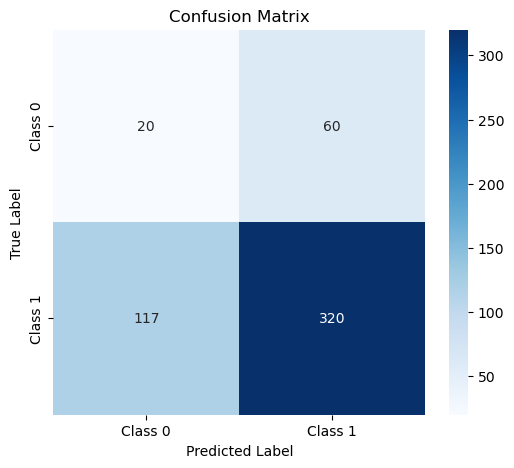

In [10]:
# Confusion matrix
cm = confusion_matrix(y, predictions)

print("Confusion Matrix")
print(cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [11]:
# Calculate sensitivity and specificity for each class
def class_sensitivity_specificity(cm, classes):
    metrics = {}
    for i, class_label in enumerate(classes):
        TP = cm[i,i]
        FN = sum(cm[i,:]) - TP
        FP = sum(cm[:,i]) - TP
        TN = cm.sum() - (TP + FP + FN)
        
        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
        
        metrics[class_label] = {
            'sensitivity': sensitivity,
            'specificity': specificity
        }
    return metrics

# Calculate metrics for each class
class_metrics = class_sensitivity_specificity(cm, np.unique(y))

# Print metrics for each class
print("\nClass-wise Metrics:")
for class_label, metrics in class_metrics.items():
    print(f"\nClass {class_label}:")
    print(f"Sensitivity: {metrics['sensitivity']:.4f}")
    print(f"Specificity: {metrics['specificity']:.4f}")

# Calculate overall sensitivity and specificity
TN, FP, FN, TP = cm.ravel()
overall_sensitivity = TP / (TP + FN)
overall_specificity = TN / (TN + FP)
print("\nOverall Metrics:")
print(f"Sensitivity: {overall_sensitivity:.4f}")
print(f"Specificity: {overall_specificity:.4f}")


Class-wise Metrics:

Class 0:
Sensitivity: 0.2500
Specificity: 0.7323

Class 1:
Sensitivity: 0.7323
Specificity: 0.2500

Overall Metrics:
Sensitivity: 0.7323
Specificity: 0.2500


DECISION SCORES METHOD (distance)

c:\Users\rajit\anaconda3\envs\ml_env\lib\site-packages\scipy\interpolate\_interpolate.py:479: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\rajit\anaconda3\envs\ml_env\lib\site-packages\scipy\interpolate\_interpolate.py:482: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


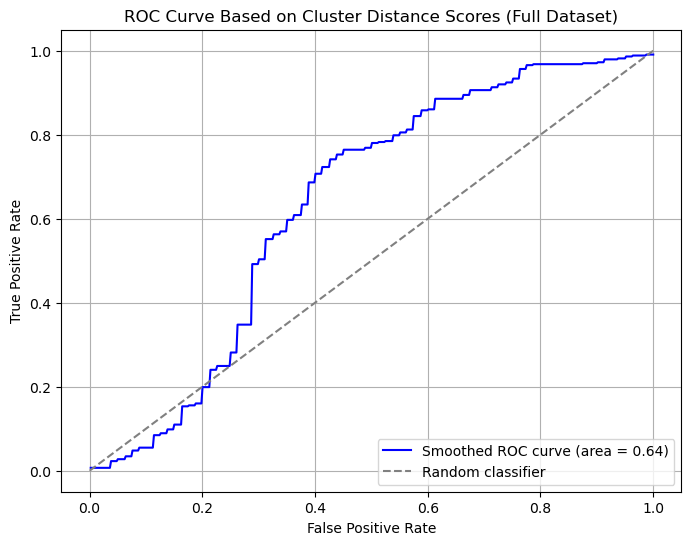

In [12]:
from scipy.interpolate import interp1d
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def decision_scores(X, kmeans_model):
    # Convert to numpy array if needed
    if hasattr(X, 'to_numpy'):
        X = X.to_numpy()
    elif hasattr(X, 'values'):
        X = X.values
    
    # Calculate distances to each cluster center
    distances = np.linalg.norm(X[:, np.newaxis] - kmeans_model.cluster_centers_, axis=2)
    
    # Return score as difference in distances
    return distances[:, 0] - distances[:, 1]

# Compute decision scores for entire dataset
scores = decision_scores(X, kmeans_unbalanced)

# ROC Curve calculation using full dataset
fpr, tpr, thresholds = roc_curve(y, scores)
roc_auc = auc(fpr, tpr)

# Interpolating to smoothen the curve
x_smooth = np.linspace(0, 1, 500)  # Create finer points for smoothing
fpr_interpolator = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")
tpr_smooth = fpr_interpolator(x_smooth)

# Plotting the smoothed ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(x_smooth, tpr_smooth, color='blue', label=f'Smoothed ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Based on Cluster Distance Scores (Full Dataset)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

KMeans - from Scratch

In [12]:
class CustomKMeans:
    def __init__(self, n_clusters=2, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None
        self.cluster_centers_ = None  # sklearn-compatible attribute

    def fit(self, X):
        X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        np.random.seed(self.random_state)
        self.centroids = X_np[np.random.choice(X_np.shape[0], self.n_clusters, replace=False)]
        self.cluster_centers_ = self.centroids  # Align with sklearn interface
        
        for _ in range(self.max_iters):
            distances = np.linalg.norm(X_np[:, np.newaxis] - self.centroids, axis=2)
            self.labels_ = np.argmin(distances, axis=1)
            
            new_centroids = np.array([X_np[self.labels_ == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
            self.cluster_centers_ = self.centroids

    def predict(self, X):
        X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        distances = np.linalg.norm(X_np[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

In [13]:
# Initialize and fit custom KMeans on entire dataset
custom_kmeans_unbalanced = CustomKMeans(n_clusters=2)
custom_kmeans_unbalanced.fit(X)
labels = custom_kmeans_unbalanced.labels_

# Map cluster labels to actual target values
if accuracy_score(y, labels) < 0.5:
    labels = 1 - labels

accuracy = accuracy_score(y, labels)
print(f'Clustering Accuracy: {accuracy*100:.3f}%')

Clustering Accuracy: 57.447%


In [14]:
print(classification_report(y, labels))

              precision    recall  f1-score   support

           0       0.12      0.29      0.17        80
           1       0.83      0.63      0.71       437

    accuracy                           0.57       517
   macro avg       0.48      0.46      0.44       517
weighted avg       0.72      0.57      0.63       517



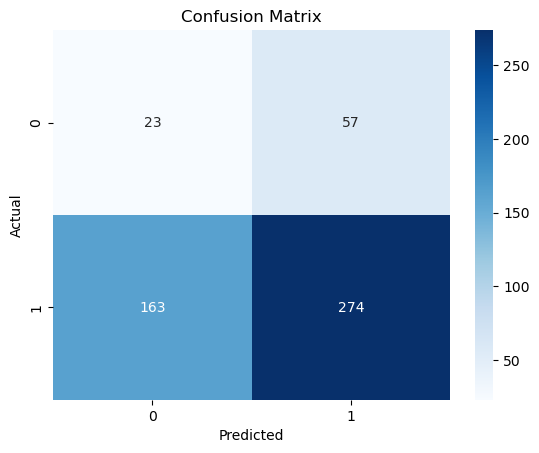

In [15]:
# Confusion Matrix
cm = confusion_matrix(y, labels)
#print("Confusion Matrix:\n", cm)

# Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Calculate sensitivity and specificity for each class
def class_sensitivity_specificity(cm, classes):
    metrics = {}
    for i, class_label in enumerate(classes):
        TP = cm[i,i]
        FN = sum(cm[i,:]) - TP
        FP = sum(cm[:,i]) - TP
        TN = cm.sum() - (TP + FP + FN)
        
        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
        
        metrics[class_label] = {
            'sensitivity': sensitivity,
            'specificity': specificity
        }
    return metrics

# Calculate metrics for each class
class_metrics = class_sensitivity_specificity(cm, np.unique(y))

# Print metrics for each class
print("\nClass-wise Metrics:")
for class_label, metrics in class_metrics.items():
    print(f"\nClass {class_label}:")
    print(f"Sensitivity: {metrics['sensitivity']:.4f}")
    print(f"Specificity: {metrics['specificity']:.4f}")

# Calculate overall sensitivity and specificity
TN, FP, FN, TP = cm.ravel()
overall_sensitivity = TP / (TP + FN)
overall_specificity = TN / (TN + FP)
print("\nOverall Metrics:")
print(f"Sensitivity: {overall_sensitivity:.4f}")
print(f"Specificity: {overall_specificity:.4f}")


Class-wise Metrics:

Class 0:
Sensitivity: 0.2875
Specificity: 0.6270

Class 1:
Sensitivity: 0.6270
Specificity: 0.2875

Overall Metrics:
Sensitivity: 0.6270
Specificity: 0.2875


c:\Users\rajit\anaconda3\envs\ml_env\lib\site-packages\scipy\interpolate\_interpolate.py:479: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\rajit\anaconda3\envs\ml_env\lib\site-packages\scipy\interpolate\_interpolate.py:482: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


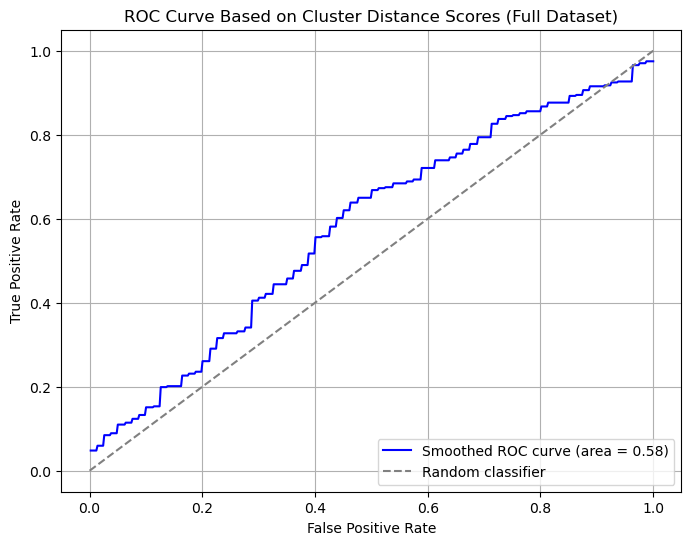

In [17]:
def decision_scores(X, kmeans_model):
    # Convert to numpy array if needed
    if hasattr(X, 'to_numpy'):
        X = X.to_numpy()
    elif hasattr(X, 'values'):
        X = X.values
    
    # Calculate distances to each cluster center
    distances = np.linalg.norm(X[:, np.newaxis] - kmeans_model.cluster_centers_, axis=2)
    
    # Return score as difference in distances
    return distances[:, 0] - distances[:, 1]

# Compute decision scores using our custom kmeans on entire dataset
scores = decision_scores(X, custom_kmeans_unbalanced)

# ROC Curve calculation
fpr, tpr, thresholds = roc_curve(y, scores)
roc_auc = auc(fpr, tpr)

# Interpolating to smoothen the curve
x_smooth = np.linspace(0, 1, 500)
fpr_interpolator = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")
tpr_smooth = fpr_interpolator(x_smooth)

# Plotting the smoothed ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(x_smooth, tpr_smooth, color='blue', label=f'Smoothed ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Based on Cluster Distance Scores (Full Dataset)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

KMEANS - BALANCED DATASET

In [13]:
# Load dataset
df_balanced = pd.read_csv("../Datasets/Balanced_Binary.csv")
df_balanced.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,target
0,1.942833,1.793557,-6.121474,-1.031132,0.487107,-0.346116,0.242493,-0.255091,-1.933793,0.456129,...,0.021294,-0.876791,-2.804382,-0.772752,0.902250,-0.283821,1.158110,-0.703144,-1.142507,1
1,-0.498266,4.290355,0.924083,-1.281493,8.153378,-2.302476,0.615296,-3.871441,1.491185,3.666561,...,-0.030226,1.076776,-1.426662,0.743057,0.212868,1.043947,0.948273,0.706128,-0.491125,1
2,-1.027512,3.363755,1.828574,-0.495802,7.458820,-2.484852,0.378415,-2.248700,-1.301424,4.136351,...,0.472101,1.206932,-0.923404,0.566657,0.293071,-0.145078,1.759649,0.516351,0.492429,1
3,2.736756,-2.241731,0.404660,-0.167861,-0.125442,0.496706,1.664382,-1.271026,0.213782,0.962099,...,-1.376614,-0.559114,-0.335620,0.088591,0.080121,-0.085828,0.038390,-0.096909,-0.426436,1
4,0.685796,0.223385,-2.080131,-0.011414,4.090118,0.650177,2.411078,2.637664,-1.594057,0.283371,...,0.540901,0.354731,-0.933172,-0.888606,0.902017,0.506791,0.640292,0.129010,0.092228,1


In [14]:
print("\nClass distribution:")
print(df_balanced['target'].value_counts())


Class distribution:
target
1    437
0    437
Name: count, dtype: int64


In [15]:
# Splitting features and target
X = df_balanced.drop(columns=['target'])
y = df_balanced['target']

In [16]:
# Standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)

KMeans - sklearn

In [17]:
from sklearn.cluster import KMeans
# KMeans - sklearn
kmeans_balanced = KMeans(n_clusters=2, init='random', n_init=20, random_state=42)
kmeans_balanced.fit(X)
predictions = kmeans_balanced.predict(X)

# Adjust cluster labels to match ground truth
if np.sum(predictions == y) < np.sum(predictions != y):
    predictions = 1 - predictions  # Inverting labels if they are flipped

# Calculate accuracy (optional, since KMeans is unsupervised)
accuracy = accuracy_score(y, predictions)
print("Final Centroids:", kmeans_balanced.cluster_centers_)
print("Cluster Assignments:", predictions)
print(f"\nAccuracy: {accuracy*100:.3f}%")


c:\Users\rajit\anaconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Final Centroids: [[ 0.26351422  0.17106008 -0.2370832   0.09467422  0.48508901  0.31631283
  -0.07226374 -0.43629238 -0.30794054 -0.19683353 -0.32195946  0.11991404
  -0.31119921  0.29294792 -0.04301323  0.10777001  0.09362465 -0.00311321
  -0.02618672  0.1267386  -0.12492927  0.05444136  0.01882734 -0.08555162
   0.14721946  0.01082323  0.09114064  0.27132879  0.00277975]
 [-0.32251995 -0.20936361  0.29017053 -0.11587354 -0.59370945 -0.38714115
   0.08844493  0.53398634  0.37689415  0.24090822  0.39405216 -0.14676502
   0.38088249 -0.3585444   0.05264469 -0.13190172 -0.11458894  0.00381032
   0.03205042 -0.15511773  0.15290325 -0.06663179 -0.02304313  0.10470821
  -0.18018464 -0.01324675 -0.11154872 -0.33208434 -0.00340218]]
Cluster Assignments: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1

In [18]:
print(f"\nAccuracy: {accuracy*100:.3f}%")

# Classification report
print(classification_report(y, predictions))


Accuracy: 87.185%
              precision    recall  f1-score   support

           0       0.91      0.82      0.87       437
           1       0.84      0.92      0.88       437

    accuracy                           0.87       874
   macro avg       0.88      0.87      0.87       874
weighted avg       0.88      0.87      0.87       874



Confusion Matrix
[[359  78]
 [ 34 403]]


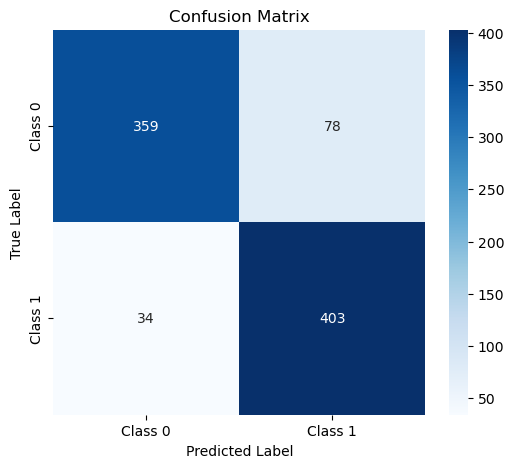

In [22]:
# Confusion matrix
cm = confusion_matrix(y, predictions)

print("Confusion Matrix")
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [23]:
# Calculate sensitivity and specificity for each class
def class_sensitivity_specificity(cm, classes):
    metrics = {}
    for i, class_label in enumerate(classes):
        TP = cm[i,i]
        FN = sum(cm[i,:]) - TP
        FP = sum(cm[:,i]) - TP
        TN = cm.sum() - (TP + FP + FN)
        
        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
        
        metrics[class_label] = {
            'sensitivity': sensitivity,
            'specificity': specificity
        }
    return metrics

# Calculate metrics for each class
class_metrics = class_sensitivity_specificity(cm, np.unique(y))

# Print metrics for each class
print("\nClass-wise Metrics:")
for class_label, metrics in class_metrics.items():
    print(f"\nClass {class_label}:")
    print(f"Sensitivity: {metrics['sensitivity']:.4f}")
    print(f"Specificity: {metrics['specificity']:.4f}")

# Calculate overall sensitivity and specificity
TN, FP, FN, TP = cm.ravel()
overall_sensitivity = TP / (TP + FN)
overall_specificity = TN / (TN + FP)
print("\nOverall Metrics:")
print(f"Sensitivity: {overall_sensitivity:.4f}")
print(f"Specificity: {overall_specificity:.4f}")


Class-wise Metrics:

Class 0:
Sensitivity: 0.8215
Specificity: 0.9222

Class 1:
Sensitivity: 0.9222
Specificity: 0.8215

Overall Metrics:
Sensitivity: 0.9222
Specificity: 0.8215


c:\Users\rajit\anaconda3\envs\ml_env\lib\site-packages\scipy\interpolate\_interpolate.py:479: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\rajit\anaconda3\envs\ml_env\lib\site-packages\scipy\interpolate\_interpolate.py:482: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


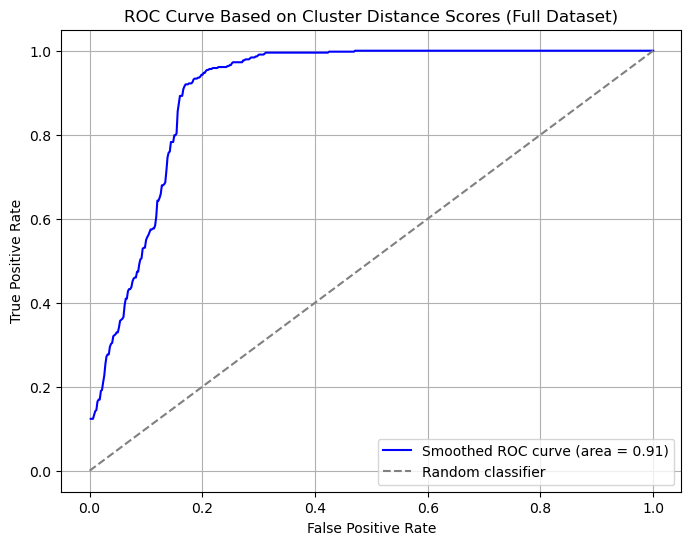

In [24]:
def decision_scores(X, kmeans):
    # Convert to numpy array if it's a DataFrame
    if hasattr(X, 'to_numpy'):
        X = X.to_numpy()
    elif hasattr(X, 'values'):
        X = X.values
    
    # Calculate distances to each cluster center
    # Reshape X to (n_samples, 1, n_features) for broadcasting
    X_reshaped = X.reshape(X.shape[0], 1, -1)
    centers = kmeans.cluster_centers_.reshape(1, -1, X.shape[1])
    
    distances = np.linalg.norm(X_reshaped - centers, axis=2)
    
    # Return score as difference in distances
    return distances[:, 1] - distances[:, 0]


# Compute decision scores using our custom kmeans on entire dataset
scores = decision_scores(X, kmeans_balanced)

# ROC Curve calculation
fpr, tpr, thresholds = roc_curve(y, scores)
roc_auc = auc(fpr, tpr)

# Interpolating to smoothen the curve
x_smooth = np.linspace(0, 1, 500)
fpr_interpolator = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")
tpr_smooth = fpr_interpolator(x_smooth)

# Plotting the smoothed ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(x_smooth, tpr_smooth, color='blue', label=f'Smoothed ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Based on Cluster Distance Scores (Full Dataset)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

KMeans - from Scratch

In [27]:
# Initialize and fit custom KMeans on entire dataset
custom_kmeans_balanced = CustomKMeans(n_clusters=2)
custom_kmeans_balanced.fit(X)
labels = custom_kmeans_balanced.labels_

# Map cluster labels to actual target values
if accuracy_score(y, labels) < 0.5:
    labels = 1 - labels

accuracy = accuracy_score(y, labels)
print(f'Clustering Accuracy: {accuracy*100:.3f}%')

Clustering Accuracy: 87.643%


In [28]:
print(classification_report(y, labels))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       437
           1       0.84      0.92      0.88       437

    accuracy                           0.88       874
   macro avg       0.88      0.88      0.88       874
weighted avg       0.88      0.88      0.88       874



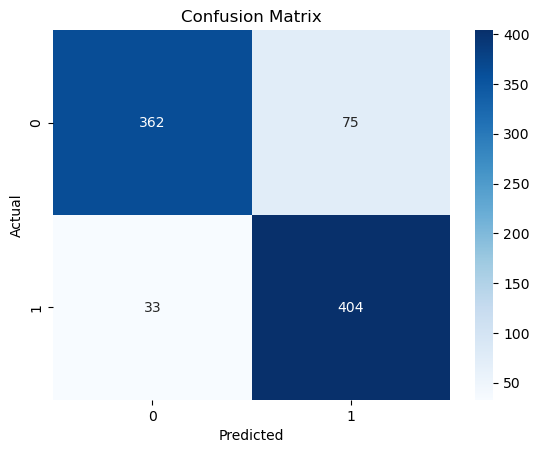

In [29]:
# Confusion Matrix
cm = confusion_matrix(y, labels)
#print("Confusion Matrix:\n", cm)

# Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# Calculate sensitivity and specificity for each class
def class_sensitivity_specificity(cm, classes):
    metrics = {}
    for i, class_label in enumerate(classes):
        TP = cm[i,i]
        FN = sum(cm[i,:]) - TP
        FP = sum(cm[:,i]) - TP
        TN = cm.sum() - (TP + FP + FN)
        
        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
        
        metrics[class_label] = {
            'sensitivity': sensitivity,
            'specificity': specificity
        }
    return metrics

# Calculate metrics for each class
class_metrics = class_sensitivity_specificity(cm, np.unique(y))

# Print metrics for each class
print("\nClass-wise Metrics:")
for class_label, metrics in class_metrics.items():
    print(f"\nClass {class_label}:")
    print(f"Sensitivity: {metrics['sensitivity']:.4f}")
    print(f"Specificity: {metrics['specificity']:.4f}")

# Calculate overall sensitivity and specificity
TN, FP, FN, TP = cm.ravel()
overall_sensitivity = TP / (TP + FN)
overall_specificity = TN / (TN + FP)
print("\nOverall Metrics:")
print(f"Sensitivity: {overall_sensitivity:.4f}")
print(f"Specificity: {overall_specificity:.4f}")


Class-wise Metrics:

Class 0:
Sensitivity: 0.8284
Specificity: 0.9245

Class 1:
Sensitivity: 0.9245
Specificity: 0.8284

Overall Metrics:
Sensitivity: 0.9245
Specificity: 0.8284


c:\Users\rajit\anaconda3\envs\ml_env\lib\site-packages\scipy\interpolate\_interpolate.py:479: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\rajit\anaconda3\envs\ml_env\lib\site-packages\scipy\interpolate\_interpolate.py:482: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


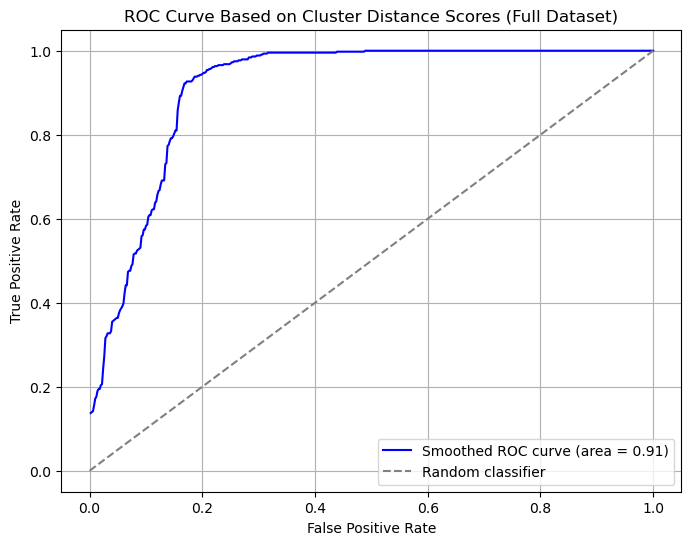

In [31]:
def decision_scores(X, kmeans):
    # Convert to numpy array if it's a DataFrame
    if hasattr(X, 'to_numpy'):
        X = X.to_numpy()
    elif hasattr(X, 'values'):
        X = X.values
    
    # Calculate distances to each cluster center
    # Reshape X to (n_samples, 1, n_features) for broadcasting
    X_reshaped = X.reshape(X.shape[0], 1, -1)
    centers = kmeans.cluster_centers_.reshape(1, -1, X.shape[1])
    
    distances = np.linalg.norm(X_reshaped - centers, axis=2)
    
    # Return score as difference in distances
    return distances[:, 0] - distances[:, 1]

# Compute decision scores using our custom kmeans on entire dataset
scores = decision_scores(X, custom_kmeans_balanced)

# ROC Curve calculation
fpr, tpr, thresholds = roc_curve(y, scores)
roc_auc = auc(fpr, tpr)

# Interpolating to smoothen the curve
x_smooth = np.linspace(0, 1, 500)
fpr_interpolator = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")
tpr_smooth = fpr_interpolator(x_smooth)

# Plotting the smoothed ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(x_smooth, tpr_smooth, color='blue', label=f'Smoothed ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Based on Cluster Distance Scores (Full Dataset)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()